In [70]:
!tail merged_data_v4.csv

@DouglasLNorton @RealMAGASteve @ricktator417 @CoreyLMJones @RealEagleWings @IWillRedPillU @RodStryker @securefreedom @thebradfordfile @DonnaWR8 @MICHELL59952525 @mike_Zollo @Boyd_2650 I had to check your page &amp; see whether you were cleverly using   or one of these complete jackasses...very nice to see youre the former.|None|1
@MultaniSaint No I told her its a terrible place with mean   people and she wants nothing to do with it|None|1
Rather than the usual  , ridicule, shame, and assumption that people have ill intent. Sometimes people screw up. Sometimes people think they are doing enough and are mistaken. Sometimes they need help. https://t.co/aetd8D2TSr|None|1
@schristakos @TenticalsIn @crypt_ghost @hortaun15 @Troll_Master101 @Unpersuaded112 @Apple Yea that was   and pubg isn’t that good of a game tbh|None|1
@Ayanfx09 @hshaban The internet desperately needs a   / snark / parody font. &amp; not Comic Sans, either.|None|1
@asteven79 @JinxTheSavage @Galeon_98 @KOSDFF Yes I know im 

In [71]:
from __future__ import print_function
from __future__ import division
import collections
import nltk
import numpy as np
from nltk.tokenize.casual import TweetTokenizer
from w266_common import utils, vocabulary
np.random.seed(266)

In [154]:
import csv
tokenizer = TweetTokenizer()
x_data = []
labels = []
sentences = []
contexts = []   
x_contexts = []
  
with open('merged_data_v4.csv', 'r') as csvfile:
    linereader = csv.reader(csvfile, delimiter = '|')
    for i, row in enumerate(linereader):
        if i == 0:
            continue
        sentence, context, sarcasm = row
#         if context not in ['nan', 'none']:
#             print(context)
#         else: pass
        sentence = re.sub("RT @[^\s]+:", "retweet", sentence)
        sentences.append(sentence)
        contexts.append(context)
        x_tokens = utils.canonicalize_words(tokenizer.tokenize(sentence))
        context_tokens = utils.canonicalize_words(tokenizer.tokenize(context))
        x_data.append(x_tokens)
        x_contexts.append(context_tokens)
        labels.append(int(sarcasm))


#rng = np.random.RandomState(5)
#rng.shuffle(x_data)  # in-place
#train_split_idx = int(0.7 * len(labels))
#test_split_idx  = int(0.9 * len(labels))

shuffle_indices = np.random.permutation(np.arange(len(labels)))
train_split_idx = int(0.6 * len(labels))
test_split_idx  = int(0.9 * len(labels))

train_indices = shuffle_indices[:train_split_idx]
validation_indices = shuffle_indices[train_split_idx:test_split_idx]
test_indices = shuffle_indices[test_split_idx:]


train_sentences = np.array(x_data)[train_indices]
train_contexts = np.array(x_contexts)[train_indices]
train_labels= np.array(labels)[train_indices] 

validation_sentences = np.array(x_data)[validation_indices]
validation_labels = np.array(labels)[validation_indices]
validation_contexts = train_contexts = np.array(x_contexts)[validation_indices]

test_sentences = np.array(x_data)[test_indices]  
test_contexts = np.array(x_contexts)[test_indices]
test_labels = np.array(labels)[test_indices]  

In [155]:
train_indices.shape

(8098,)

In [157]:
train_sentences.shape

(8098,)

In [156]:
train_contexts.shape

(4049, 1)

In [159]:
np.unique(x_contexts)

array(['nan', 'none'], dtype='<U4')

In [127]:
###  EDA


%matplotlib inline
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

def find_substr(sentence, sub_sent):
    return list(map(lambda x:' '.join(sub_sent) in ' '.join(x),sentence))

import re

def topic_finder(sentence):
    pattern = r'#([0-9a-zA-Z]*)\b'
    return re.findall(pattern,' '.join(sentence))

sent_list = test_sentences[confusion['false_negative']]
def count_topics(sent_list):
    list_o_list = list(map(lambda x: topic_finder(x),sent_list))
    flatten_list = [l  for sublist in list_o_list for l in sublist]

    storage_dict = {}


    for i in flatten_list:
        if i not in storage_dict.keys():
            storage_dict.update({i:1})
        else: 
            storage_dict[i]+=1
    return storage_dict, list_o_list, flatten_list

def print_n_confident_examples(test_sentences,test_labels,y_pred, n = 10):
    false_negative = (y_pred != test_labels) & (test_labels == 1)
    test_sentences_fn = test_sentences[false_negative]
    index_n_fn = np.argsort(nb.predict_proba(x_test_sparse[false_negative])[:,0])[sum(false_negative)-(n+1):]
    print('\n\nTop '+str(n)+' false negatives examples.\n')
    list(map(lambda x: print(' '.join(x)),test_sentences_fn[index_n_fn]))

    false_positive = (y_pred != test_labels) & (test_labels == 0)
    test_sentences_fp = test_sentences[false_positive]
    index_n_fp = np.argsort(nb.predict_proba(x_test_sparse[false_positive])[:,1])[sum(false_positive)-(n+1):]
    print('\n\nTop '+str(n)+' false positive examples.\n')
    list(map(lambda x: print(' '.join(x)),test_sentences_fp[index_n_fp]))

    true_negative = (y_pred == test_labels) & (test_labels == 0)
    test_sentences_tn = test_sentences[true_negative]
    index_n_tn = np.argsort(nb.predict_proba(x_test_sparse[true_negative])[:,0])[sum(true_negative)-(n+1):]
    print('\n\nTop '+str(n)+' true negative examples.\n')
    list(map(lambda x: print(' '.join(x)),test_sentences_tn[index_n_tn]))

    true_positive = (y_pred == test_labels) & (test_labels == 1)
    test_sentences_tp = test_sentences[true_positive]
    index_n_tp = np.argsort(nb.predict_proba(x_test_sparse[true_positive])[:,1])[sum(true_positive)-(n+1):]

    print('\n\nTop '+str(n)+' true positive examples.\n')
    list(map(lambda x: print(' '.join(x)),test_sentences_tp[index_n_tp]))
    
    return {'false_negative':false_negative, 'false_positive':false_positive, 'true_negative':true_negative, 'true_positive':true_positive}

def histo_ht_use_count(ht_reference_count, sub_title=''):
    range_ = min(ht_reference_count) , max(ht_reference_count)

    bin_ = np.array(range(range_[0]-1, range_[1]+1)) +0.5

    plt.hist(ht_reference_count, bins =bin_ )

    plt.xlabel('Number of Hashtags Used')
    plt.ylabel('Tweet Count')
    plt.title('Histogram of Number of Tweets Utilized\n'+sub_title)
    #plt.axis([range_[0]-0.5,range_[1]+0.5,])
    plt.grid(True)

    plt.show()

In [110]:
vocab = vocabulary.Vocabulary(utils.flatten(train_sentences),8000)
x_ids = vocab.words_to_ids(train_sentences[0])
print("x_ids =", vocab.word_to_id)
print(x_ids)

x_ids = {'artist': 4044, 'baseball': 2755, 'trend': 2416, 'patti': 6888, 'bonus': 476, 'caution': 4590, 'gurus': 6887, 'spi': 6890, 'either': 451, 'bizzare': 6891, 'etextbook': 6892, 'seaweed': 6918, 'blizninamarch': 4600, '12pm': 4591, 'besides': 3815, 'addition': 2253, 'accountable': 4157, 'proposed': 6938, 'cardiovascular': 6894, 'tabletop': 4603, 'struss': 6384, 'investing': 5732, 'dies': 2417, 'blitz': 6949, 'railroad': 7026, 'filing': 3501, 'portfolio': 4593, 'broadcasting': 4594, 'censure': 6889, 'given': 736, 'thanks': 142, 'interested': 737, 'japans': 4609, 'files': 3186, 'corsica': 6900, 'pshaw': 4596, 'jflops': 6901, 'kiya': 7583, 'roman': 6038, '5500remaining': 6903, 'boat': 6905, 'yezhai': 5733, 'caramel': 6906, 'gulf': 4597, 'regard': 2853, 'castle': 6908, 'fortune': 7017, 'bosch': 6909, 'leftlukas': 6910, 'leaves': 4045, '. ..': 5735, '99p': 6912, 'rats': 6913, 'walls': 4598, 'antis': 5736, 'fringehead': 6915, 'lives': 481, 'china-pakistan': 5737, 'totally': 369, 'dianna

In [111]:
train_dict_, train_ll_, train_flatl_ = count_topics(train_sentences)


In [112]:
# list_of_train_ids = list(map(vocab.words_to_ids, train_sentences))
# print(list_of_train_ids[0:20])


# list_of_validation_ids = list(map(vocab.words_to_ids, validation_sentences))

# list_of_test_ids = list(map(vocab.words_to_ids, test_sentences))


In [113]:
collections.Counter(list_of_train_ids[0])

Counter({2: 3,
         6: 1,
         13: 1,
         14: 1,
         17: 2,
         20: 1,
         31: 1,
         96: 1,
         624: 1,
         1693: 1,
         1738: 1,
         2226: 1,
         3742: 1,
         3752: 1,
         4518: 1,
         4785: 1})

In [114]:
from scipy.sparse import csr_matrix 
def sparsify_data(list_of_ids):
    row_indices = []
    col_indices = []
    values = []
    rows = len(list_of_ids)

    for row, x_ids in enumerate(list_of_ids):
        x_fdict = collections.Counter(x_ids)
        for wordid, count in x_fdict.items():
            row_indices.append(row)       
            col_indices.append(wordid)  # column is word id
            values.append(count)        # value is count
    x_sparse = csr_matrix((values, (row_indices, col_indices)),
                              shape=[rows, vocab.size])
    return x_sparse

In [115]:
x_train_sparse = sparsify_data(list_of_train_ids)
x_validation_sparse = sparsify_data(list_of_validation_ids)
x_test_sparse = sparsify_data(list_of_test_ids)


In [119]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

nb = MultinomialNB(alpha =  1)
nb.fit(x_train_sparse, train_labels)
y_pred = nb.predict(x_test_sparse)





f1 = f1_score(test_labels, y_pred)
acc = accuracy_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred)
print(" acc: {:.02%}, recall: {:.02%}, precision: {:.02%}, f1: {:.02%},".format(acc, recall, precision, f1))


ValueError: Found input variables with inconsistent numbers of samples: [9447, 8098]

In [120]:
linear_weights = nb.feature_log_prob_[1,:] - nb.feature_log_prob_[0,:]  # populate this with actual values

top_negative_features = np.argsort(linear_weights)[0:40]
top_positive_features = np.argsort(-linear_weights)[0:40]


AttributeError: 'MultinomialNB' object has no attribute 'feature_log_prob_'

In [121]:
print("Most negative features:")
for idx in top_negative_features:
    print("  {:s} ({:.02f})".format(vocab.id_to_word[idx], 
                                    linear_weights[idx]))
print("")
print("Most positive features:")
for idx in top_positive_features:
    print("  {:s} ({:.02f})".format(vocab.id_to_word[idx], 
                                    linear_weights[idx]))
    


Most negative features:
  “ (-5.35)
  % (-5.28)
  new (-5.05)
  too (-5.00)
  win (-4.91)
  off (-4.84)
  those (-4.84)
  other (-4.79)
  many (-4.62)
  happy (-4.59)
  team (-4.59)
  man (-4.53)
  which (-4.53)
  latest (-4.52)
  last (-4.51)
  cams (-4.51)
  community (-4.48)
  great (-4.42)
  money (-4.36)
  find (-4.33)
  work (-4.29)
  :) (-4.20)
  face (-4.20)
  been (-4.15)
  course (-4.11)
  important (-4.09)
  joke (-4.06)
  daily (-4.06)
  ive (-4.02)
  enough (-4.00)
  long (-4.00)
  yet (-4.00)
  🤔 (-4.00)
  same (-3.98)
  clearly (-3.98)
  good (-3.97)
  ✨ (-3.92)
  gets (-3.90)
  ➡ (-3.90)
  trading (-3.90)

Most positive features:
  does (4.25)
  bitcoin (4.12)
  probably (3.84)
  sometimes (3.84)
  either (3.78)
  wasnt (3.54)
  nothing (3.51)
  cricket (3.49)
  knew (3.46)
  club (3.46)
  august (3.30)
  dumb (3.30)
  death (3.26)
  cloth-stagram (3.23)
  lol (3.19)
  glad (3.15)
  month (3.15)
  jesus (3.15)
  help (3.10)
  ◀ (3.07)
  decades (3.07)
  most (3.05)
  ac

###### 

In [122]:
confusion = print_n_confident_examples(test_sentences,test_labels,y_pred, n = 10)

NotFittedError: This MultinomialNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

retweets in false_negative:0%" 
retweets in false_positive:0%" 
retweets in true_negative:0%" 
retweets in true_positive:0%"






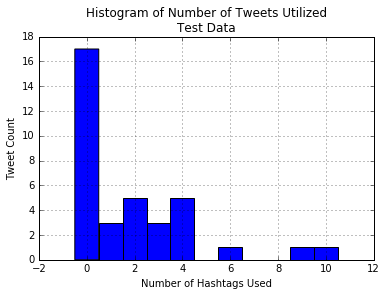

In [129]:
# retweet counter
sub_sent =['rt', 'ACCOUNT', ':']

print(
    'retweets in false_negative:{0:.0f}%"'.format(100*sum(find_substr(test_sentences[confusion['false_negative']], sub_sent))/sum(confusion['false_negative'])),
    '\nretweets in false_positive:{0:.0f}%"'.format(100*sum(find_substr(test_sentences[confusion['false_positive']], sub_sent))/sum(confusion['false_positive'])),
    '\nretweets in true_negative:{0:.0f}%"'.format(100*sum(find_substr(test_sentences[confusion['true_negative']], sub_sent))/sum(confusion['true_negative'])),
    '\nretweets in true_positive:{0:.0f}%"'.format(100*sum(find_substr(test_sentences[confusion['true_positive']], sub_sent))/sum(confusion['true_positive']))
    )


print('\n')
dict_ , list_list_, flat_=count_topics(sent_list)

ht_reference_count =  [len(i) for i in list_list_]

print('\n')

histo_ht_use_count(ht_reference_count, sub_title='Test Data')

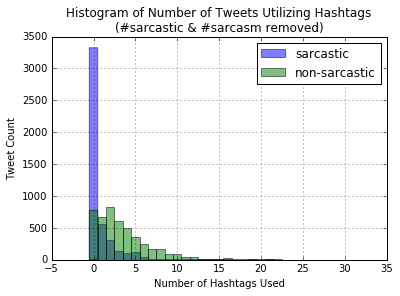

In [130]:
###  EDA  Prospective

sarcastic_sents = train_sentences[train_labels == 1]
non_sarcastic_sents = train_sentences[train_labels == 0]
    

# sub_sent =['rt', 'ACCOUNT', ':']

# print(
#     'retweets in false_negative:{0:.0f}%"'.format(100*sum(find_substr(sarcastic_sents, sub_sent))/sarcastic_sents.shape[0]),
#     '\nretweets in false_positive:{0:.0f}%"'.format(100*sum(find_substr(non_sarcastic_sents, sub_sent))/non_sarcastic_sents.shape[0])
#     )


print('\n')


train_dict_s, train_ll_s, train_flatl_s = count_topics(sarcastic_sents)

train_dict_ns, train_ll_ns, train_flatl_ns = count_topics(non_sarcastic_sents)

ht_reference_count_s =  [len(i) for i in train_ll_s]

ht_reference_count_ns =  [len(i) for i in train_ll_ns]

print('\n')

range_ = min(ht_reference_count_s+ht_reference_count_ns) , max(ht_reference_count_s+ht_reference_count_ns)

bin_ = np.array(range(range_[0]-1, range_[1]+1)) +0.5

plt.hist(ht_reference_count_s, bins =bin_ , label = 'sarcastic',alpha = 0.5)
plt.hist(ht_reference_count_ns, bins =bin_, label = 'non-sarcastic' ,alpha = 0.5)

plt.xlabel('Number of Hashtags Used')
plt.ylabel('Tweet Count')
plt.title('Histogram of Number of Tweets Utilizing Hashtags\n(#sarcastic & #sarcasm removed)')
#plt.axis([range_[0]-0.5,range_[1]+0.5,])
plt.grid(True)

plt.legend(loc='upper right')
plt.show()


#### Caption 
 The above figure shows the distribution of tweets across the number of hashtags utilized to reference topics.  The above distribution is on the training data after the #sarcasm and #sarcastic labels were removed from the sentences.  

####  Verbiage

We see that for sarcastic tweets there is a right-skewed in the distribution of number of hashtags utilized/referenced in a given tweet.  This means that for any sarcastic tweets, we expect the user will be less likely to utilize additional tweets to accompany accompany .  In the non-sarcastic distribution there is less of a skew in the distribution with a median value around 4 hashtags in a tweet, of course #sarcastic or #sarcasm was not removed from this set of tweet still, we that generally non-sarcastic tweets having a combination of topics referenced.  

This 

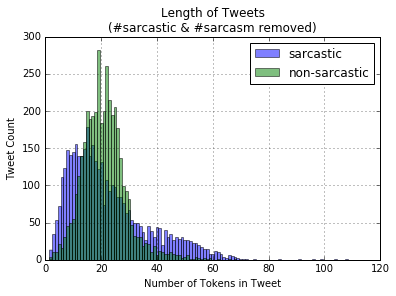

In [125]:
sarcastic_sents = train_sentences[train_labels == 1]
non_sarcastic_sents = train_sentences[train_labels == 0]

length_s = list(map(lambda l: len(l), sarcastic_sents))

length_ns = list(map(lambda l: len(l), non_sarcastic_sents))

print('\n')

range_ = min(length_s+length_ns) , max(length_s+length_ns)

bin_ = np.array(range(range_[0]-1, range_[1]+1)) +0.5

plt.hist(length_s, bins =bin_ , label = 'sarcastic',alpha = 0.5)
plt.hist(length_ns, bins =bin_, label = 'non-sarcastic' ,alpha = 0.5)

plt.xlabel('Number of Tokens in Tweet')
plt.ylabel('Tweet Count')
plt.title('Length of Tweets\n(#sarcastic & #sarcasm removed)')
#plt.axis([range_[0]-0.5,range_[1]+0.5,])
plt.grid(True)

plt.legend(loc='upper right')
plt.show()


#### Caption 
 The above figure shows the distribution of tweets across the number of hashtags utilized to reference topics.  The above distribution is on the training data after the #sarcasm and #sarcastic labels were removed from the sentences.  

####  Verbiage


In [ ]:
sarcastic_sents = train_contexts[train_labels == 1]
non_sarcastic_sents = train_sentences[train_labels == 0]

length_s = list(map(lambda l: len(l), sarcastic_sents))

length_ns = list(map(lambda l: len(l), non_sarcastic_sents))

print('\n')

range_ = min(length_s+length_ns) , max(length_s+length_ns)

bin_ = np.array(range(range_[0]-1, range_[1]+1)) +0.5

plt.hist(length_s, bins =bin_ , label = 'sarcastic',alpha = 0.5)
plt.hist(length_ns, bins =bin_, label = 'non-sarcastic' ,alpha = 0.5)

plt.xlabel('Number of Tokens in Tweet')
plt.ylabel('Tweet Count')
plt.title('Length of Tweets\n(#sarcastic & #sarcasm removed)')
#plt.axis([range_[0]-0.5,range_[1]+0.5,])
plt.grid(True)

plt.legend(loc='upper right')
plt.show()

#### Caption 

####  Verbiage

